# **Laboratorio de SIS420**
**Nombre:** Rúa Echalar Juan Manuel **Carrera:** Ingeniería en Ciencias de la Computación
## Regresión lineal múltiple

In [1]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [73]:
# Cargar datos
# data = np.loadtxt(os.path.join('Datasets', 'ex1data2.txt'), delimiter=',')
data = np.loadtxt('/content/gdrive/MyDrive/IA/SIS420/SmartphonePrice.csv', delimiter=',')
X = data[:, :6]
y = data[:, 6]
m = y.size
print(m)
# imprimir algunos puntos de datos
print('{:>8s}{:>8s}{:>10s}'.format('X[:,0]', 'X[:, 1]', 'y'))
print('-'*26)
for i in range(10):
    print('{:8.0f}{:8.0f}{:10.0f}'.format(X[i, 0], X[i, 1], y[i]))

11000
  X[:,0] X[:, 1]         y
--------------------------
      23      32        74
      12      32        -5
      36      64        67
       6      32       -59
      23      32        -4
      72     256       462
      90     512       744
      47      32        39
      71     512       598
       8      32       -41


In [74]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [75]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[2.33006005e+01 3.20000000e+01 1.24310752e+01 1.62203166e+03
  2.00517214e+02 4.77577373e+00]
 [1.22115314e+01 3.20000000e+01 1.46593427e+01 1.35501329e+03
  1.58487617e+02 7.17740860e+00]
 [3.57343094e+01 6.40000000e+01 1.80570531e+01 1.89008519e+03
  1.46396101e+02 5.51949090e+00]
 ...
 [3.11561715e+01 6.40000000e+01 2.41538394e+01 1.97595295e+03
  1.35867960e+02 5.77760653e+00]
 [2.00452634e+01 1.60000000e+01 1.10553610e+01 1.24029166e+03
  1.27392006e+02 1.03585252e+00]
 [8.65998006e+01 1.02400000e+03 9.03847340e+01 5.67450604e+03
  1.69549753e+02 2.89741942e-01]]
Media calculada: [  50.43516877  203.13163636   45.80282597 2547.0685704   185.45646379
    3.3076021 ]
Desviación estandar calculada: [  28.86635598  245.61104383   45.50953822 1140.08891979   37.78762188
    2.62526901]
[[-0.94000671 -0.69675872 -0.73329135 -0.8113726   0.39856306  0.55924617]
 [-1.32415873 -0.69675872 -0.6843287  -1.04558097 -0.71369525  1.47406094]
 [-0.50927313 -0.56647142 -0.6096694  -0.57625627 -1

In [76]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [77]:
print(X)

[[ 1.         -0.94000671 -0.69675872 ... -0.8113726   0.39856306
   0.55924617]
 [ 1.         -1.32415873 -0.69675872 ... -1.04558097 -0.71369525
   1.47406094]
 [ 1.         -0.50927313 -0.56647142 ... -0.57625627 -1.03368142
   0.84253796]
 ...
 [ 1.         -0.66787083 -0.56647142 ... -0.50093954 -1.31229491
   0.94085765]
 [ 1.         -1.05277941 -0.76190237 ... -1.14620613 -1.53659995
  -0.86533973]
 [ 1.          1.25282983  3.34214761 ...  2.74315224 -0.42095029
  -1.1495432 ]]


# Descenso por el gradiente

In [78]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J

In [79]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

theta calculado por el descenso por el gradiente: [311.64579754  84.60073368 109.36073907  36.01554207  54.13443164
  -6.65045138 -49.72539683]
El precio predecido para el (usando el descenso por el gradiente) es: $713


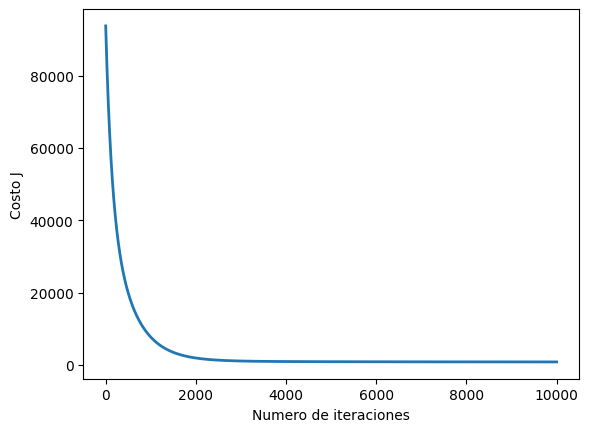

In [80]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001 # alpha = 0.003
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(7)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio para una casa de 1650 sq-ft, con 3 dormitorios
X_array = [1,85.54193161164888,512,60.92946196123948,4377.12096795211,147.19265413197596,0.38532477228989337]
X_array[1:7] = (X_array[1:7] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El precio predecido para el (usando el descenso por el gradiente) es: ${:.0f}'.format(price))

In [13]:
# Estimar el precio para una casa de 1650 sq-ft, con 3 dormitorios
X_array = [1,49.57860657953991,64,20.438729342198773,1806.5191908867298,128.96310921816902,0.8372261869162232]
X_array[1:10] = (X_array[1:10] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El precio predecido para el celular (usando el descenso por el gradiente) es: ${:.0f}'.format(price))

El precio predecido para la miel (usando el descenso por el gradiente) es: $249


In [14]:
# Estimar el precio para una casa de 1650 sq-ft, con 3 dormitorios
X_array = [1,14.587305698214447,16,12.283367917165213,1488.1074957101018,244.39740931350943,1.1060471155077523]
X_array[1:10] = (X_array[1:10] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El precio predecido para el celular (usando el descenso por el gradiente) es: ${:.0f}'.format(price))

El precio predecido para la miel (usando el descenso por el gradiente) es: $78


In [15]:
# Estimar el precio para una casa de 1650 sq-ft, con 3 dormitorios
X_array = [1,91.83371253989026,512,139.2345690159481,5514.949822153595,124.14210690471182,1.020396790034982]
X_array[1:10] = (X_array[1:10] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El precio predecido el celular (usando el descenso por el gradiente) es: ${:.0f}'.format(price))

El precio predecido para la miel (usando el descenso por el gradiente) es: $839


In [16]:
# Estimar el precio para una casa de 1650 sq-ft, con 3 dormitorios
X_array = [1,54.96439421952375,256,46.6582692517232,2740.8592324580136,233.48892425908377,1.9548227014332364]
X_array[1:10] = (X_array[1:10] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El precio predecido para el celular (usando el descenso por el gradiente) es: ${:.0f}'.format(price))

El precio predecido para la miel (usando el descenso por el gradiente) es: $376


In [17]:
# Estimar el precio para una casa de 1650 sq-ft, con 3 dormitorios
X_array = [1,95.92110079724596,1024,177.6412611083463,5776.304408578959,236.95754883527275,0.3638774671720688]
X_array[1:10] = (X_array[1:10] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El precio predecido para el celular  (usando el descenso por el gradiente) es: ${:.0f}'.format(price))

El precio predecido para la miel (usando el descenso por el gradiente) es: $1115


In [18]:
# Estimar el precio para una casa de 1650 sq-ft, con 3 dormitorios
X_array = [1,47.60084632485484,32,12.865383760196135,1899.8825618937592,124.6414214324207,5.9956870261873005]
X_array[1:10] = (X_array[1:10] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El precio predecido para el celular  (usando el descenso por el gradiente) es: ${:.0f}'.format(price))

El precio predecido para la miel (usando el descenso por el gradiente) es: $130


In [19]:
# Estimar el precio para una casa de 1650 sq-ft, con 3 dormitorios
X_array = [1,68.2324148720127,128,16.234747782521524,2614.6148256289425,202.37743301146668,3.6658117983132437]
X_array[1:10] = (X_array[1:10] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El precio predecido para el celular (usando el descenso por el gradiente) es: ${:.0f}'.format(price))

El precio predecido para la miel (usando el descenso por el gradiente) es: $300


In [20]:
# Estimar el precio para una casa de 1650 sq-ft, con 3 dormitorios
X_array = [1,95.4850181326681,512,97.34317373160806,4183.734407063921,183.76456656051437,1.3993418290446245]
X_array[1:10] = (X_array[1:10] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El precio predecido para el celular  (usando el descenso por el gradiente) es: ${:.0f}'.format(price))

El precio predecido para la miel (usando el descenso por el gradiente) es: $736


In [21]:
# Estimar el precio para una casa de 1650 sq-ft, con 3 dormitorios
X_array = [1,28.98882152511959,32,13.495837187220594,1707.8448735900438,207.34325409813076,4.112585964576202]
X_array[1:10] = (X_array[1:10] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El precio predecido para el celular  (usando el descenso por el gradiente) es: ${:.0f}'.format(price))

El precio predecido para la miel (usando el descenso por el gradiente) es: $88


# **Ecuación de la Normal**

In [22]:
# Cargar datos
data = np.loadtxt('/content/gdrive/MyDrive/IA/SIS420/SmartphonePrice.csv', delimiter=',')
X = data[:, :6]
y = data[:, 6]
m = y.size
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [23]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [24]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Estimar el precio para una casa de superficie de 1650 sq-ft y tres dormitorios

X_array = [1,85.54193161164888,512,60.92946196123948,4377.12096795211,147.19265413197596,0.38532477228989337]
price = np.dot(X_array, theta)

print('Precio predecido para el celular (usando la ecuación de la normal): ${:.0f}'.format(price))

Theta calculado a partir de la ecuación de la normal: [ 17.19141216   3.1416406    0.47667852   0.68336717   0.04019736
  -0.17585608 -18.70875558]
Precio predecido para una cada de superficie de 1650 sq-ft y 3 dormitorios (usando la ecuación de la normal): $714


In [81]:
# Primer array
X_array1 = [1, 95.4850181326681, 512, 97.34317373160806, 4183.734407063921, 183.76456656051437, 1.3993418290446245]
price1 = np.dot(X_array1, theta)

print('El precio predecido para el primer array es: ${:.0f}'.format(price1))

# Estimar el precio para una casa de 1650 sq-ft, con 3 dormitorios
X_array = [1, 14.587305698214447, 16, 12.283367917165213, 1488.1074957101018, 244.39740931350943, 1.1060471155077523]
price = np.dot(X_array, theta)

print('El precio predecido es para lel celular : ${:.0f}'.format(price))

# Estimar el precio para una casa de 1650 sq-ft, con 3 dormitorios
X_array = [1, 91.83371253989026, 512, 139.2345690159481, 5514.949822153595, 124.14210690471182, 1.020396790034982]
price = np.dot(X_array, theta)

print('El precio predecido es para el celular : ${:.0f}'.format(price))

# Cuarto array
X_array4 = [1, 54.96439421952375, 256, 46.6582692517232, 2740.8592324580136, 233.48892425908377, 1.9548227014332364]
price4 = np.dot(X_array4, theta)

print('El precio predecido para el el celular : ${:.0f}'.format(price4))

# Estimar el precio para una casa de 1650 sq-ft, con 3 dormitorios
X_array = [1, 95.92110079724596, 1024, 177.6412611083463, 5776.304408578959, 236.95754883527275, 0.3638774671720688]
price = np.dot(X_array, theta)

print('El precio predecido es para el celular : ${:.0f}'.format(price))

# Estimar el precio para una casa de 1650 sq-ft, con 3 dormitorios
X_array = [1, 47.60084632485484, 32, 12.865383760196135, 1899.8825618937592, 124.6414214324207, 5.9956870261873005]
price = np.dot(X_array, theta)

print('El precio predecido es para el celular : ${:.0f}'.format(price))

# Estimar el precio para una casa de 1650 sq-ft, con 3 dormitorios
X_array = [1, 68.2324148720127, 128, 16.234747782521524, 2614.6148256289425, 202.37743301146668, 3.6658117983132437]
price = np.dot(X_array, theta)

print('El precio predecido es para el celular : ${:.0f}'.format(price))

# Estimar el precio para una casa de 1650 sq-ft, con 3 dormitorios
X_array = [1, 95.4850181326681, 512, 97.34317373160806, 4183.734407063921, 183.76456656051437, 1.3993418290446245]
price = np.dot(X_array, theta)

print('El precio predecido es para el celular : ${:.0f}'.format(price))

# Estimar el precio para una casa de 1650 sq-ft, con 3 dormitorios
X_array = [1, 28.98882152511959, 32, 13.495837187220594, 1707.8448735900438, 207.34325409813076, 4.112585964576202]
price = np.dot(X_array, theta)

print('El precio predecido es para el celular : ${:.0f}'.format(price))

El precio predecido para el primer array es: $293081
El precio predecido es para lel celular : $82615
El precio predecido es para el celular : $366760
El precio predecido para el el celular : $181363
El precio predecido es para el celular : $437913
El precio predecido es para el celular : $110024
El precio predecido es para el celular : $160680
El precio predecido es para el celular : $293081
El precio predecido es para el celular : $97620


# **Regresión polinomial**

In [32]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [33]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [36]:
# Cargar datos
#data = np.loadtxt(os.path.join('Datasets', 'capacidad_adquisitiva.csv'), delimiter=';')
#from numpy import genfromtxt
#data = genfromtxt(os.path.join('Datasets', 'capacidad_adquisitiva.csv'), delimiter=';')
data = np.loadtxt('/content/gdrive/MyDrive/IA/SIS420/SmartphonePrice.csv', delimiter=",",skiprows=1)
#print(data)
X = data[:, :6]
y = data[:, 6]
m = y.size
#print(X)
#print(y)
# imprimir algunos puntos de datos
#print('{:>8s}{:>10s}'.format(X, y))
#print('-'*26)
for i in range(20):
    print('{:8.0f}{:10.0f}'.format(X[i, 0], y[i]))

      23        74
      12        -5
      36        67
       6       -59
      23        -4
      72       462
      90       744
      47        39
      71       598
       8       -41
      73       648
      93       754
      59       347
      48        60
      74       696
      68       357
       0         7
      32        51
       9        96
      25        13


In [37]:
print(X.shape)

(11000, 6)


In [38]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva.

    fig = pyplot.figure()  # abre una nueva figura

    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Edad personas')
    pyplot.xlabel('Capacidad adquisitiva 1,000s')

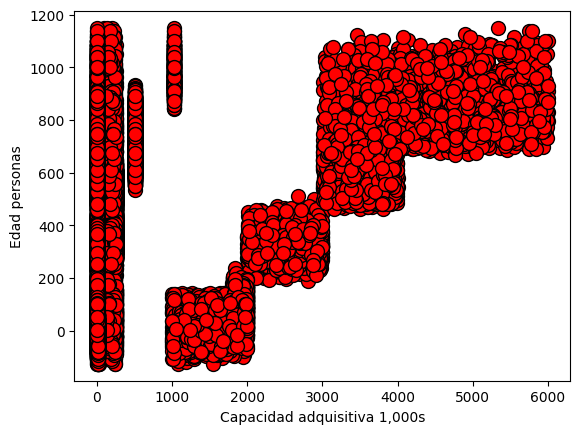

In [39]:
plotData(X, y)

In [40]:
X = np.concatenate([X, X * X], axis=1)

In [41]:
print(X.shape)

(11000, 12)


In [42]:
print(X)

[[2.33006005e+01 3.20000000e+01 1.24310752e+01 ... 2.63098672e+06
  4.02071531e+04 2.28080147e+01]
 [1.22115314e+01 3.20000000e+01 1.46593427e+01 ... 1.83606102e+06
  2.51183249e+04 5.15151942e+01]
 [3.57343094e+01 6.40000000e+01 1.80570531e+01 ... 3.57242201e+06
  2.14318184e+04 3.04647797e+01]
 ...
 [3.11561715e+01 6.40000000e+01 2.41538394e+01 ... 3.90439007e+06
  1.84601025e+04 3.33807372e+01]
 [2.00452634e+01 1.60000000e+01 1.10553610e+01 ... 1.53832340e+06
  1.62287232e+04 1.07299043e+00]
 [8.65998006e+01 1.02400000e+03 9.03847340e+01 ... 3.22000188e+07
  2.87471188e+04 8.39503932e-02]]


In [43]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [44]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

#print(X)
#print('Media calculada:', mu)
#print('Desviación estandar calculada:', sigma)
#print(X_norm)

In [45]:
print(mu.shape,sigma.shape)

(12,) (12,)


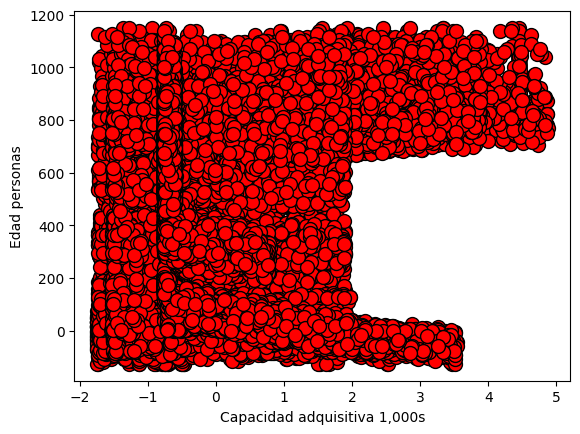

In [46]:
plotData(X_norm, y)

In [47]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
#X_norm = np.concatenate([X_norm, X_norm * X_norm], axis=1)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [48]:
print(X.shape)

(11000, 13)


In [49]:
print(X)

[[ 1.         -0.94000671 -0.69675872 ... -0.70903522  0.31232174
   0.21428666]
 [ 1.         -1.32415873 -0.69675872 ... -0.81834271 -0.76234399
   1.45059692]
 [ 1.         -0.50927313 -0.56647142 ... -0.57958171 -1.0249066
   0.54403473]
 ...
 [ 1.         -0.66787083 -0.56647142 ... -0.53393393 -1.23655997
   0.66961405]
 [ 1.         -1.05277941 -0.76190237 ... -0.85928358 -1.39548463
  -0.7217591 ]
 [ 1.          1.25282983  3.34214761 ...  3.35690024 -0.50389181
  -0.76435334]]


# Descenso por el gradiente

In [50]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J

In [51]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

In [52]:
def exercise(x_array):
    x_array = np.insert(x_array, 0, 1)
    x_array = np.append(x_array, x_array[1:]**2)
    return x_array

theta calculado por el descenso por el gradiente: [311.65987626  22.52611633 134.69342745  32.51594513  40.80239259
  -4.00103276 -52.0531229   89.93762152 -23.7447013  -11.07968924
 -10.01863308  -2.56173254   4.07265828]
La capacidad adquisitiva para una persona de 33 (usando el descenso por el gradiente): $76


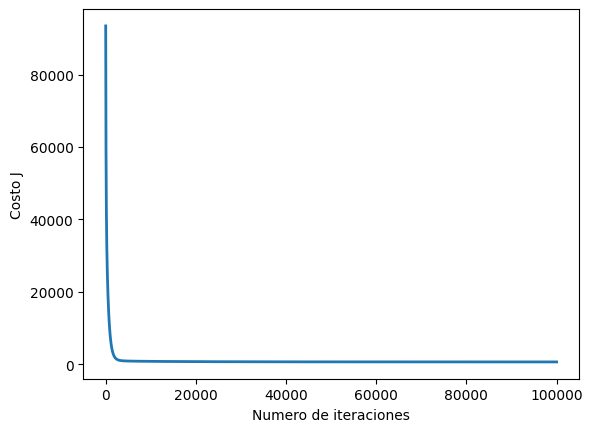

In [53]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 100000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(X.shape[1])
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# La capacidad adquisitiva de una persona de 33 años
X_array = [28.98882152511959, 32, 13.495837187220594, 1707.8448735900438, 207.34325409813076, 4.112585964576202]
X_array=exercise(X_array)
X_array[1:X_array.shape[0]] = (X_array[1:X_array.shape[0]] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('el precio del celular (usando el descenso por el gradiente): ${:.0f}'.format(price))

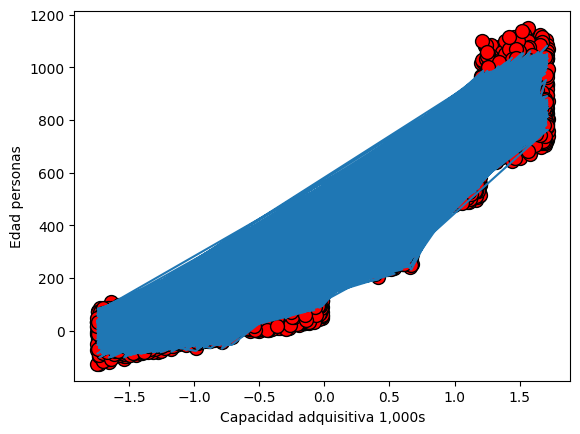

In [54]:
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')

In [60]:
X_array = [93.09912332079527,1024,131.41803872343513,5432.962973949297,143.66274255211658,0.5190752214762246]
X_array=exercise(X_array)
X_array[1:X_array.shape[0]] = (X_array[1:X_array.shape[0]] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El precio del celular es (usando el descenso por el gradiente): ${:.0f}'.format(price))

X_array = [36.83338278877473,32,18.063222604610516,1866.7406908257426,239.38261973079858,0.925142481021326]
X_array=exercise(X_array)
X_array[1:X_array.shape[0]] = (X_array[1:X_array.shape[0]] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El precio del celular es (usando el descenso por el gradiente): ${:.0f}'.format(price))

X_array = [63.7096567117414,256,39.86198930777026,2207.7074517486913,224.16306271190678,2.308163669671715]
X_array=exercise(X_array)
X_array[1:X_array.shape[0]] = (X_array[1:X_array.shape[0]] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El precio del celular es (usando el descenso por el gradiente): ${:.0f}'.format(price))

X_array = [95.92110079724596,1024,177.6412611083463,5776.304408578959,236.95754883527275,0.3638774671720688]
X_array=exercise(X_array)
X_array[1:X_array.shape[0]] = (X_array[1:X_array.shape[0]] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El precio del celular es (usando el descenso por el gradiente): ${:.0f}'.format(price))

X_array = [47.60084632485484,32,12.865383760196135,1899.8825618937592,124.6414214324207,5.9956870261873005]
X_array=exercise(X_array)
X_array[1:X_array.shape[0]] = (X_array[1:X_array.shape[0]] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El precio del celular es (usando el descenso por el gradiente): ${:.0f}'.format(price))

X_array = [29.148279298838265,32,12.761827681323476,1749.3841069051357,135.26232876968376,5.24917645839197]
X_array=exercise(X_array)
X_array[1:X_array.shape[0]] = (X_array[1:X_array.shape[0]] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El precio del celular es (usando el descenso por el gradiente): ${:.0f}'.format(price))

X_array = [75.23589639739761,256,66.51799197118548,3166.3355405334755,191.24593196690444,1.7377362344627323]
X_array=exercise(X_array)
X_array[1:X_array.shape[0]] = (X_array[1:X_array.shape[0]] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El precio del celular es (usando el descenso por el gradiente): ${:.0f}'.format(price))

X_array = [50.164072957636385,256,20.981215635623016,2636.781478377584,191.2570478384327,3.413036519619971]
X_array=exercise(X_array)
X_array[1:X_array.shape[0]] = (X_array[1:X_array.shape[0]] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El precio del celular es (usando el descenso por el gradiente): ${:.0f}'.format(price))

X_array = [98.09093787115147,512,161.61079461676445,5113.272910288059,209.79604571450517,0.3123695976338019]
X_array=exercise(X_array)
X_array[1:X_array.shape[0]] = (X_array[1:X_array.shape[0]] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El precio del celular es (usando el descenso por el gradiente): ${:.0f}'.format(price))

X_array = [64.71047732906813,64,40.952827195321234,2847.7343100169323,139.90348918323792,0.470482604278335]
X_array=exercise(X_array)
X_array[1:X_array.shape[0]] = (X_array[1:X_array.shape[0]] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El precio del celular es (usando el descenso por el gradiente): ${:.0f}'.format(price))

El precio del celular es (usando el descenso por el gradiente): $1024
El precio del celular es (usando el descenso por el gradiente): $160
El precio del celular es (usando el descenso por el gradiente): $378
El precio del celular es (usando el descenso por el gradiente): $1049
El precio del celular es (usando el descenso por el gradiente): $118
El precio del celular es (usando el descenso por el gradiente): $68
El precio del celular es (usando el descenso por el gradiente): $494
El precio del celular es (usando el descenso por el gradiente): $307
El precio del celular es (usando el descenso por el gradiente): $859
El precio del celular es (usando el descenso por el gradiente): $353


In [61]:
X_array[1:X_array.shape[0]]
print(np.dot(X_array, theta))

352.94993704138807


# **Ecuación de la Normal**

In [62]:
# Cargar datos
data = np.loadtxt('/content/gdrive/MyDrive/IA/SIS420/SmartphonePrice.csv', delimiter=",",skiprows=1)
X = data[:, :6]
y = data[:, 6]
m = y.size
X_original = X.copy()
X = np.concatenate([X, X * X], axis=1)
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [63]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [64]:
def exercise(x_array):
    x_array = np.insert(x_array, 0, 1)
    x_array = np.append(x_array, x_array[1:]**2)
    return x_array

In [67]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Estimar el precio para una casa de superficie de 1650 sq-ft y tres dormitorios

X_array = [28.98882152511959, 32, 13.495837187220594, 1707.8448735900438, 207.34325409813076, 4.112585964576202]
X_array= exercise(X_array)
price = np.dot(X_array, theta)

print('Precio del celular (usando la ecuación de la normal): ${:.0f}'.format(price))

Theta calculado a partir de la ecuación de la normal: [ 4.85125158e+01  5.85653045e-01  5.77344674e-01  4.85383001e-01
  4.47847429e-02 -1.33127086e-01 -1.95194210e+01  3.15197324e-02
 -1.34559541e-04 -4.75087456e-04 -2.57960903e-06 -1.10170127e-04
  1.41691418e-01]
Precio del celular (usando la ecuación de la normal): $76


In [69]:
X_array = [93.09912332079527,1024,131.41803872343513,5432.962973949297,143.66274255211658,0.5190752214762246]
X_array=exercise(X_array)
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El precio del celular es (usando el descenso por el gradiente): ${:.0f}'.format(price))

X_array = [36.83338278877473,32,18.063222604610516,1866.7406908257426,239.38261973079858,0.925142481021326]
X_array=exercise(X_array)
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El precio del celular es (usando el descenso por el gradiente): ${:.0f}'.format(price))

X_array = [63.7096567117414,256,39.86198930777026,2207.7074517486913,224.16306271190678,2.308163669671715]
X_array=exercise(X_array)
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El precio del celular es (usando el descenso por el gradiente): ${:.0f}'.format(price))

X_array = [95.92110079724596,1024,177.6412611083463,5776.304408578959,236.95754883527275,0.3638774671720688]
X_array=exercise(X_array)
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El precio del celular es (usando el descenso por el gradiente): ${:.0f}'.format(price))

X_array = [47.60084632485484,32,12.865383760196135,1899.8825618937592,124.6414214324207,5.9956870261873005]
X_array=exercise(X_array)
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El precio del celular es (usando el descenso por el gradiente): ${:.0f}'.format(price))

X_array = [29.148279298838265,32,12.761827681323476,1749.3841069051357,135.26232876968376,5.24917645839197]
X_array=exercise(X_array)
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El precio del celular es (usando el descenso por el gradiente): ${:.0f}'.format(price))

X_array = [75.23589639739761,256,66.51799197118548,3166.3355405334755,191.24593196690444,1.7377362344627323]
X_array=exercise(X_array)
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El precio del celular es (usando el descenso por el gradiente): ${:.0f}'.format(price))

X_array = [50.164072957636385,256,20.981215635623016,2636.781478377584,191.2570478384327,3.413036519619971]
X_array=exercise(X_array)
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El precio del celular es (usando el descenso por el gradiente): ${:.0f}'.format(price))

X_array = [98.09093787115147,512,161.61079461676445,5113.272910288059,209.79604571450517,0.3123695976338019]
X_array=exercise(X_array)
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El precio del celular es (usando el descenso por el gradiente): ${:.0f}'.format(price))

X_array = [64.71047732906813,64,40.952827195321234,2847.7343100169323,139.90348918323792,0.470482604278335]
X_array=exercise(X_array)
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El precio del celular es (usando el descenso por el gradiente): ${:.0f}'.format(price))

El precio del celular es (usando el descenso por el gradiente): $1018
El precio del celular es (usando el descenso por el gradiente): $158
El precio del celular es (usando el descenso por el gradiente): $378
El precio del celular es (usando el descenso por el gradiente): $1044
El precio del celular es (usando el descenso por el gradiente): $118
El precio del celular es (usando el descenso por el gradiente): $69
El precio del celular es (usando el descenso por el gradiente): $493
El precio del celular es (usando el descenso por el gradiente): $312
El precio del celular es (usando el descenso por el gradiente): $858
El precio del celular es (usando el descenso por el gradiente): $351


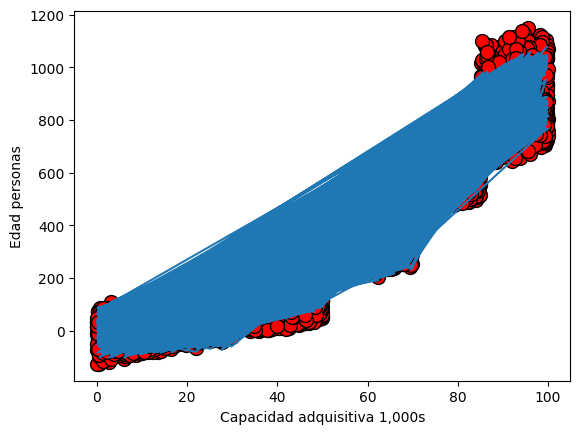

In [70]:
plotData(X[:, 1], y)
#X = np.concatenate([np.ones((m, 1)), X], axis=1)
#X = np.concatenate([X, X * X], axis=1)

pyplot.plot(X[:, 1], np.dot(X, theta), '-')